In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 회귀 모델에 대한 성능 평가 지표들
https://partrita.github.io/posts/regression-error/
https://dailyheumsi.tistory.com/167

# 선형회귀
 ## 2018년 지역별 인구증가율과 고령인구비율

17 17


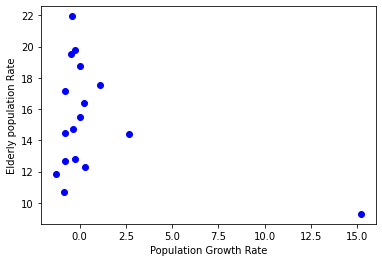

In [3]:
#선형회귀 (Linear Regression)
pop_inc = [0.3,-0.78,-1.26,0.03,1.11,
           15.17,0.24,-0.24,-0.47,-0.77,
           -0.37,-0.85,-0.41,-0.27,0.02,
           -0.76,2.66]
pop_old = [12.27,14.44,11.87,18.75,17.52,
           9.29,16.37,19.78,19.51,12.65,
           14.74,10.72,21.94,12.83,15.51,
           17.14,14.42]
print(len(pop_inc), len(pop_old))

plt.plot(pop_inc, pop_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

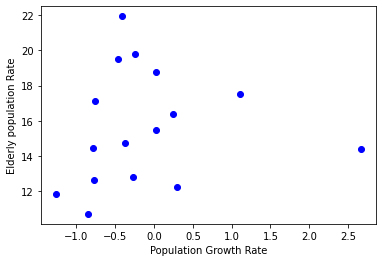

In [4]:
#극단치 데이터 제거
pop_inc = pop_inc[:5] + pop_inc[6:]
pop_old = pop_old[:5] + pop_old[6:]

plt.plot(pop_inc, pop_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

### 회귀와 최소 제곱법
- https://terms.naver.com/entry.nhn?docId=3569970&cid=58944&categoryId=58970
- 예측함수 y =ax + b
- 오차는 yi-f(xi)를 최소화하는 것이 좋으며, 이를 위해 최소제곱법 1~n의합(yi-f(xi)^2 = (yi - (axi+b))^2이 되며
- 손실함수의 최소값은 편미분이 0이므로 a, b에 대한 편미분을 실시하면
- 단, xm, ym은 xi, yi들의 평균값이다.

![a, b의 손실함수](https://ncc-phinf.pstatic.net/20130312_19/yksysh_1363052767956xl10F_JPEG/%BF%B9%C0%FC%C4%C1%C5%D9%C3%F7-%BC%F6%C1%A4.jpg?type=w646)




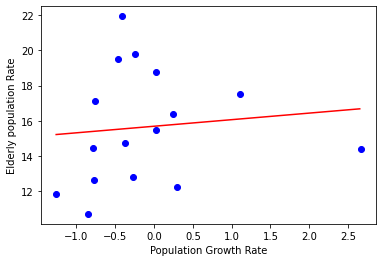

In [5]:
#최소제곱법으로 회귀선 구하기
#1 - train data
x = np.array(pop_inc)
y = np.array(pop_old)

#2 - 최소제곱법 w,b
w = np.sum((y - np.mean(y)) * (x - np.mean(x))) / np.sum((x - np.mean(x)) ** 2) # 위에 시그마 있는 식으로 가중치 구함
b = np.mean(y) - w * np.mean(x) # 편향수치 구함

#3 - 회귀선 구하기
line_x = np.arange(min(x), max(x), 0.01)
line_y = w * line_x + b

#4 - 그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(x, y, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

# 머신러닝으로 회귀선 구하기
## 1차 가설함수 y = wx+b

0 w: 0.46235502   b: 0.9131015   loss: 228.61844
100 w: -0.8524574   b: 7.2292123   loss: 80.34029
200 w: -0.22261165   b: 11.600818   loss: 26.281841
300 w: 0.13643104   b: 14.067082   loss: 12.384476
400 w: 0.29675418   b: 15.170646   loss: 10.043863
500 w: 0.3532126   b: 15.559366   loss: 9.790415
600 w: 0.36893106   b: 15.66759   loss: 9.772793
700 w: 0.37239388   b: 15.691432   loss: 9.772009
800 w: 0.3729947   b: 15.695568   loss: 9.771987
900 w: 0.3730756   b: 15.696127   loss: 9.771986
1000 w: 0.37308267   b: 15.696174   loss: 9.771988


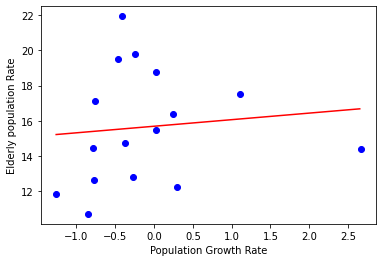

In [9]:
# 텐서플로우로 회귀선 구하기
import tensorflow as tf
import random

#1 - train data
x = np.array(pop_inc)
y = np.array(pop_old)

#2 - w, b의 랜덤 초기값
w = tf.Variable(random.random())
b = tf.Variable(random.random())

#3 - 손실함수(MSE)
def compute_loss():
    y_pred = w * x + b
    loss = tf.reduce_mean((y - y_pred) ** 2)
    return loss # 오차를 리턴

#4 - 최적화함수
optimizer = tf.optimizers.Adam(lr = 0.07)
for i in range(1001):
    optimizer.minimize(compute_loss, var_list = [w, b])
    if(i % 100 == 0):
        print(i, 'w:', w.numpy(), '  b:', b.numpy(), '  loss:', compute_loss().numpy())

#5 - 회귀선 구하기
line_x = np.arange(min(x), max(x), 0.01)
line_y = w * line_x + b

#6 - 그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y,'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

In [ ]:
# 텐서플로우로 2차 회귀선 구하기
# h(x) = w1*x*x + w2*x + b
import tensorflow as tf
import random


99 a: -0.976277 b: 5.2168646 c: -3.3214083 d: 6.157243 loss: 71.50748
199 a: -0.86972666 b: 3.7762454 c: -1.7288661 d: 9.913631 loss: 35.56514
299 a: -0.48069263 b: 1.723852 c: -0.25588834 d: 12.724324 loss: 17.926634
399 a: -0.07887799 b: 0.09713867 c: 0.39623034 d: 14.64322 loss: 10.891918
499 a: 0.24514773 b: -1.0214546 c: 0.58283436 d: 15.800578 loss: 8.59802
599 a: 0.45940825 b: -1.6919687 c: 0.5850682 d: 16.425339 loss: 7.9813066
699 a: 0.5790425 b: -2.044238 c: 0.5475867 d: 16.729155 loss: 7.8448133
799 a: 0.63655543 b: -2.2073889 c: 0.5187119 d: 16.862595 loss: 7.8200636
899 a: 0.6606673 b: -2.274287 c: 0.50397676 d: 16.915482 loss: 7.816407
999 a: 0.6695537 b: -2.2986343 c: 0.49800953 d: 16.934347 loss: 7.8159704


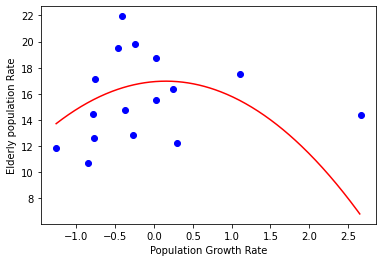

In [ ]:
# 텐서플로우로 3차 다항식 회귀선 구하기

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3,-0.78,-1.26,0.03,1.11,0.24,-0.24,-0.47,-0.77,-0.37,-0.85,-0.41,-0.27,0.02,-0.76,2.66]
Y = [12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

#a, b의 랜덤 초기값
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

#손실함수 : 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a*X*X*X  + b*X*X + c*X + d
    loss = tf.reduce_mean((Y-y_pred)**2)
    return loss

#최적화함수
optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])

    if i%100==99:
        print(i, 'a:',a.numpy(), 'b:', b.numpy(), 'c:',c.numpy(), 'd:',d.numpy(), 'loss:', compute_loss().numpy())

#회귀선 구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x*line_x + b*line_x*line_x + c*line_x + d

#그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

In [11]:
#딥러닝을 이용한 회귀분석
#1 - 모델 구성
import tensorflow as tf
import random

x = np.array(pop_inc)
y = np.array(pop_old)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6, activation = 'sigmoid', input_dim = 1),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = , loss = '')

In [ ]:
#2 - 모델 학습
model.fit(x, y, epochs = 500)

In [ ]:
#3 - 모델 예측
model.predict(x)

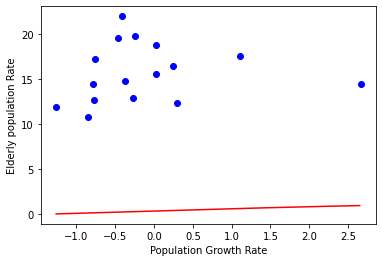

In [14]:
#4 - 학습 후 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(x), max(x), 0.01)
line_y = model.predict(line_x)

#5 -그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y,'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

In [ ]:
#6 -모델 가중치 확인


In [ ]:
#7 - 모델 저장
# 참고 : https://datascienceschool.net/view-notebook/51e147088d474fe1bf32e394394eaea7/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#8 -모델 불러오기
from google.colab import files
uploaded = files.upload()


In [ ]:
#9 - 모델 사용하기
from tensorflow.keras.models import load_model
